In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

rand_state = 1000

In [70]:
df = pd.read_csv('bikeshare.csv')

df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1


In [71]:
# dropping dteday column
df = df.drop(columns='dteday')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.6 MB


#### Preprocessing

In [73]:
df.isna().sum()/len(df)

season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
notbizday     0.0
weathersit    0.0
temp          0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

No NA Values

In [74]:
sum(df.duplicated())

2

In [75]:
df = df.drop_duplicates()

In [76]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.317258,1.425332,0.000028,-0.000067,0.000088,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.999986,1.000025,1.000024,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.477133,-3.251072,-1.553844,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-0.815280,-0.763121,-0.699669,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,0.000000,1.000000,0.015647,0.014364,0.031898,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.846573,0.791848,0.519881,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.612292,1.932159,5.399715,977.000000


#### Splitting the data

In [54]:
y = df['cnt']
X = df.drop('cnt', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [56]:
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

## KNN Regression

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(X_train_sc, y_train)

KNeighborsRegressor()

In [59]:
# Predicting the Test set results
y_hat = KNN_regression.predict(X_test_sc)

In [63]:
df_predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
df_predictions.head()

,y_test,y_hat
4495,26,29.6
4418,47,33.0
7141,11,45.8
14766,232,254.4
13601,278,337.0


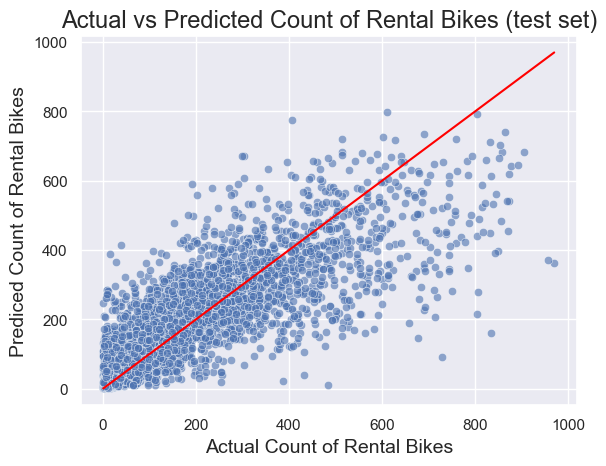

In [66]:
sns.scatterplot(x='y_test', y='y_hat', alpha=0.6, data=df_predictions)
sns.lineplot(x='y_test', y='y_test', data=df_predictions, color='red')

plt.xlabel('Actual Count of Rental Bikes', fontsize=14)
plt.ylabel('Prediced Count of Rental Bikes', fontsize=14)
plt.title('Actual vs Predicted Count of Rental Bikes (test set)', fontsize=17)
plt.show()

Am I visually happy with this graph?

#### Performance Metrics

In [67]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

11623.59

In [68]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

107.81

That seems a little high considering the average rental per day was 189 bikes. So to be off by 100 bikes is a pretty wide range.

#### Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train_sc, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [79]:
MSE_CV = round(np.mean(-NMSE),4)
MSE_CV

11912.5965

In [80]:
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

109.1448

#### Choosing K

In [81]:
MSE_CV=[]
MSE_test = []

k=100

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train_sc, y_train)
    MSE_i = np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train_sc, y = y_train, cv = 10 , scoring="neg_mean_squared_error" ))
    MSE_CV.append(MSE_i)
    
    MSE_test.append(np.mean(np.square(y_test - KNN_i.predict(X_test_sc))))
    
optimal_k = pd.DataFrame({'MSE_CV': np.round(MSE_CV,2), 'MSE_test':np.round(MSE_test,2), 'K':range(1,k)})

In [82]:
optimal_k.head(10)

,MSE_CV,MSE_test,K
0,15367.81,15596.56,1
1,12425.81,12044.42,2
2,11787.18,11546.93,3
3,11569.05,11411.97,4
4,11463.16,11623.59,5
5,11546.03,11521.61,6
6,11615.48,11617.59,7
7,11708.27,11717.11,8
8,11863.77,11900.22,9
9,11928.90,12033.34,10


In [83]:
np.argmin(optimal_k['MSE_CV'])

4

In [84]:
optimal_k.loc[np.argmin(optimal_k['MSE_CV']), 'K']

5

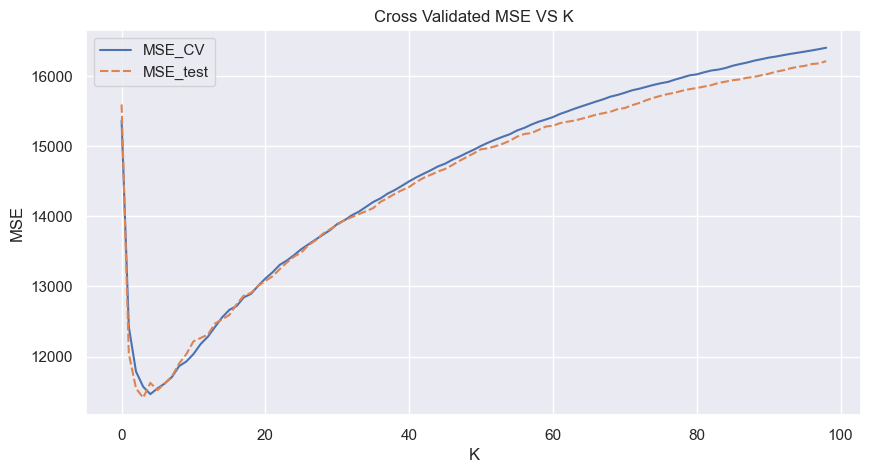

In [85]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k.drop('K', axis=1))
plt.title('Cross Validated MSE VS K')
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()